## Example notebook
This example code reads the data from the xml file and creates the histogram of maximum-minumum values

In [1]:
%%capture
#""%matplotlib inline
%matplotlib notebook

%load_ext autoreload
%autoreload 2

%reset -f

In [2]:
from begepro.rw import CAENhandler
import numpy as np
import pylab as plt

In [4]:
filename='/home/giachero/data/BEGe/BeGE_137Cs_2020-08-05.xml'
dr=CAENhandler.XMLreader(filename)
Mm =list()
ch = 1    # Channel to analyze
N  = 5000 # Set to None for acquire all che events

In [5]:
while True:
    data=dr.get()
    if data is None or (N is not None and len(Mm)==N): 
        break
    if ch in data['channels']:
        Mm.append(np.max(data['channels'][ch])-np.min(data['channels'][ch]))
print ('Processed data: %d'%len(Mm))

Processed data: 5000


<IPython.core.display.Javascript object>


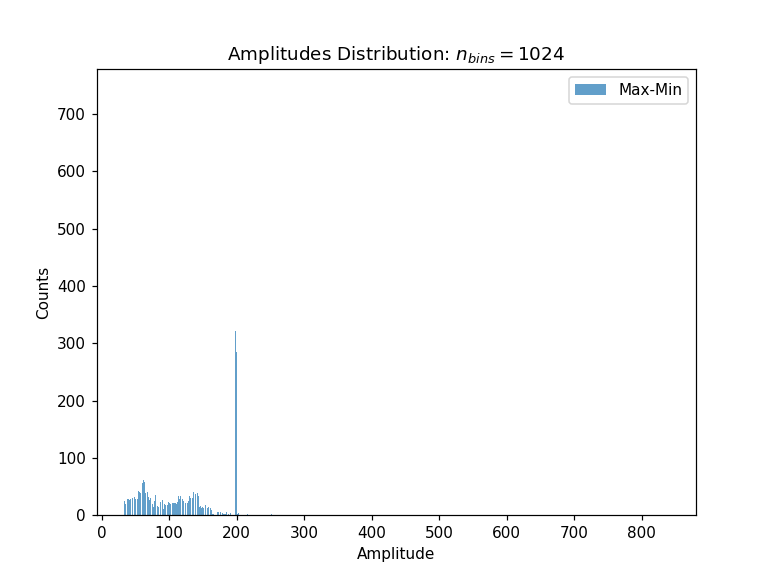

In [6]:
nbins=2**10
plt.clf()
plt.hist(Mm, bins=nbins, density=False, alpha=0.7, rwidth=1, label='Max-Min')
plt.title('Amplitudes Distribution: $n_{bins} = %d$'%nbins )
plt.xlabel('Amplitude')
plt.ylabel('Counts')
plt.legend()
plt.show()